In [6]:
!pip install pandas

In [7]:
!pip install folium

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [51]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Load Data

In [52]:
NL = pd.read_csv('data/Dataset_for_Solo_Project.csv', sep=';')
LS = pd.read_csv('data/LifeStyleNL.csv', sep=';')

In [53]:
import os
os.getcwd()

'C:\\Users\\imypo\\Downloads\\Solo-Project'

## Population Dynamics

In [54]:
NL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Columns: 190 entries, ID to NaturalizationsRelative_188
dtypes: float64(188), int64(1), object(1)
memory usage: 179.7+ KB


In [55]:
NL.shape

(121, 190)

In [56]:
NL.head()

,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,k_80YearsOrOlder_9,GreenPressure_10,GreyPressure_11,TotalPopulation_12,NeverMarried_13,Married_14,Widowed_15,Divorced_16,TotalPopulation_17,NorthNetherlands_18,EastNetherlands_19,WestNetherlands_20,SouthNetherlands_21,TotalPopulation_22,LessThan5000Inhabitants_23,k_5000To19999Inhabitants_24,k_20000To49999Inhabitants_25,k_50000To99999Inhabitants_26,k_100000InhabitantsOrMore_27,TotalNumberOfMunicipalities_28,LessThan5000Inhabitants_29,k_5000To19999Inhabitants_30,k_20000To49999Inhabitants_31,k_50000To99999Inhabitants_32,k_100000InhabitantsOrMore_33,TotalForeignNationalities_34,American_35,Belgian_36,British_37,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43,PersonsWithSurinameseBackground_44,PersonsWithAntilleanBackground_45,TotalPrivateHouseholds_46,MalesAndFemales_47,Males_48,Females_49,MultiPersonHouseholds_50,AverageHouseholdsize_51,TotalPersonsInPrivateHouseholds_52,ChildrenInPrivateHouseholds_53,LiveBornChildren_54,Deaths_55,NaturalIncrease_56,Immigration_57,EmigrationIncludingAdministrativeC_58,NetMigration_59,TotalGrowth_60,TotalGrowthRelative_61,LiveBornChildren_62,LiveBornChildrenRelative_63,SexRatio_64,AverageNumberOfChildrenPerFemale_65,TotalLiveBornChildren_66,YoungerThan20Years_67,k_20To24Years_68,k_25To29Years_69,k_30YearsOrOlder_70,k_1stChild_71,k_2ndChild_72,k_3rdChild_73,k_4thAndSubsequentChildren_74,LiveBornChildrenMotherNotMarried_75,Deaths_76,DeathsRelative_77,DeathsSexRatio_78,LifeExpectancyAtBirthMale_79,LifeExpectancyAtBirthFemale_80,k_28WeeksOrMoreRelative_81,k_24WeeksOrMoreRelative_82,PerinatalMortality24_83,PerinatalMortality24Relative_84,PerinatalMortality28_85,PerinatalMortality28Relative_86,Deaths4WeeksAfterBirth_87,Deaths4WeeksAfterBirthRelative_88,Deaths1YearAfterBirth_89,Deaths1YearAfterBirthRelative_90,k_1To4Years_91,k_5To14Years_92,k_15To44Years_93,k_45To64Years_94,k_65To79Years_95,k_80YearsOrOlder_96,PersonsMovedWithinMunicipalities_97,TotalPersons_98,TotalPersonsRelative_99,WithinTheSameProvinceRelative_100,FamiliesUntil2010Relative_101,TotalImmigration_102,Dutch_103,TotalNonDutch_104,EuropeanUnionExcludingDutch_105,Moroccan_106,Turkish_107,TotalEmigrationIncludingAdministra_108,Dutch_109,TotalNonDutch_110,EuropeanUnionExcludingDutch_111,Moroccan_112,Turkish_113,TotalEmigrationExcludingAdministra_114,Dutch_115,TotalNonDutch_116,EuropeanUnionExcludingDutch_117,Moroccan_118,Turkish_119,TotalImmigration_120,TheNetherlands_121,EuropeanUnionExcludingTheNetherl_122,Indonesia_123,SurinameAndTheNetherlandsAntilles_124,Suriname_125,TheFormerNetherlandsAntilles_126,Morocco_127,Turkey_128,SpecificEmigrationCountries_129,TotalEmigrationIncludingAdministra_130,TheNetherlands_131,EuropeanUnionExcludingTheNetherl_132,Indonesia_133,SurinameAndTheNetherlandsAntilles_134,Suriname_135,TheFormerNetherlandsAntilles_136,Morocco_137,Turkey_138,SpecificEmigrationCountries_139,TotalEmigrationExcludingAdministra_140,TheNetherlands_141,EuropeanUnionExcludingTheNetherl_142,Indonesia_143,SurinameAndTheNetherlandsAntilles_144,Suriname_145,TheFormerNetherlandsAntilles_146,Morocco_147,Turkey_148,SpecificEmigrationCountries_149,TotalImmigration_150,EuropeanUnionExcludingTheNetherl_151,IndonesiaSurinameTheNetherlan_152,SurinameAndTheNetherlandsAntilles_153,Indonesia_154,Suriname_155,TheFormerNetherlandsAntilles_156,Morocco_157,Turkey_158,SpecificEmigrationCountries_159,TotalEmigrationExcludingAdministra_160,EuropeanUnionExcludingTheNetherl_161,IndonesiaSurinameTheNetherlan_162,SurinameAndTheNetherlandsAntilles_163,Indonesia_164,Suriname_165,TheFormerNetherlandsAntilles_166,Morocco_167,Turkey_168,SpecificEmigrationCountries_169,Marriages_170,MarriagesPer1000Inhabitants_171,MarriagesPer1000UnmarriedMen_172,k_1stMarriageForBothPartnersRelative_173,AverageAgeMarryingMales_174,AverageAgeMarryingFemales_175,MarriageDissolutions_176,MarriageDissolutionsPer1000Inhab_177,Marr

In [57]:
NL.Periods = NL.Periods.str.replace('JJ00','')

In [58]:
NL.Periods=NL['Periods'].astype(int)

In [59]:
NL.head()


,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,YoungerThan20Years_5,k_20To44Years_6,k_45To64Years_7,k_65To79Years_8,k_80YearsOrOlder_9,GreenPressure_10,GreyPressure_11,TotalPopulation_12,NeverMarried_13,Married_14,Widowed_15,Divorced_16,TotalPopulation_17,NorthNetherlands_18,EastNetherlands_19,WestNetherlands_20,SouthNetherlands_21,TotalPopulation_22,LessThan5000Inhabitants_23,k_5000To19999Inhabitants_24,k_20000To49999Inhabitants_25,k_50000To99999Inhabitants_26,k_100000InhabitantsOrMore_27,TotalNumberOfMunicipalities_28,LessThan5000Inhabitants_29,k_5000To19999Inhabitants_30,k_20000To49999Inhabitants_31,k_50000To99999Inhabitants_32,k_100000InhabitantsOrMore_33,TotalForeignNationalities_34,American_35,Belgian_36,British_37,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43,PersonsWithSurinameseBackground_44,PersonsWithAntilleanBackground_45,TotalPrivateHouseholds_46,MalesAndFemales_47,Males_48,Females_49,MultiPersonHouseholds_50,AverageHouseholdsize_51,TotalPersonsInPrivateHouseholds_52,ChildrenInPrivateHouseholds_53,LiveBornChildren_54,Deaths_55,NaturalIncrease_56,Immigration_57,EmigrationIncludingAdministrativeC_58,NetMigration_59,TotalGrowth_60,TotalGrowthRelative_61,LiveBornChildren_62,LiveBornChildrenRelative_63,SexRatio_64,AverageNumberOfChildrenPerFemale_65,TotalLiveBornChildren_66,YoungerThan20Years_67,k_20To24Years_68,k_25To29Years_69,k_30YearsOrOlder_70,k_1stChild_71,k_2ndChild_72,k_3rdChild_73,k_4thAndSubsequentChildren_74,LiveBornChildrenMotherNotMarried_75,Deaths_76,DeathsRelative_77,DeathsSexRatio_78,LifeExpectancyAtBirthMale_79,LifeExpectancyAtBirthFemale_80,k_28WeeksOrMoreRelative_81,k_24WeeksOrMoreRelative_82,PerinatalMortality24_83,PerinatalMortality24Relative_84,PerinatalMortality28_85,PerinatalMortality28Relative_86,Deaths4WeeksAfterBirth_87,Deaths4WeeksAfterBirthRelative_88,Deaths1YearAfterBirth_89,Deaths1YearAfterBirthRelative_90,k_1To4Years_91,k_5To14Years_92,k_15To44Years_93,k_45To64Years_94,k_65To79Years_95,k_80YearsOrOlder_96,PersonsMovedWithinMunicipalities_97,TotalPersons_98,TotalPersonsRelative_99,WithinTheSameProvinceRelative_100,FamiliesUntil2010Relative_101,TotalImmigration_102,Dutch_103,TotalNonDutch_104,EuropeanUnionExcludingDutch_105,Moroccan_106,Turkish_107,TotalEmigrationIncludingAdministra_108,Dutch_109,TotalNonDutch_110,EuropeanUnionExcludingDutch_111,Moroccan_112,Turkish_113,TotalEmigrationExcludingAdministra_114,Dutch_115,TotalNonDutch_116,EuropeanUnionExcludingDutch_117,Moroccan_118,Turkish_119,TotalImmigration_120,TheNetherlands_121,EuropeanUnionExcludingTheNetherl_122,Indonesia_123,SurinameAndTheNetherlandsAntilles_124,Suriname_125,TheFormerNetherlandsAntilles_126,Morocco_127,Turkey_128,SpecificEmigrationCountries_129,TotalEmigrationIncludingAdministra_130,TheNetherlands_131,EuropeanUnionExcludingTheNetherl_132,Indonesia_133,SurinameAndTheNetherlandsAntilles_134,Suriname_135,TheFormerNetherlandsAntilles_136,Morocco_137,Turkey_138,SpecificEmigrationCountries_139,TotalEmigrationExcludingAdministra_140,TheNetherlands_141,EuropeanUnionExcludingTheNetherl_142,Indonesia_143,SurinameAndTheNetherlandsAntilles_144,Suriname_145,TheFormerNetherlandsAntilles_146,Morocco_147,Turkey_148,SpecificEmigrationCountries_149,TotalImmigration_150,EuropeanUnionExcludingTheNetherl_151,IndonesiaSurinameTheNetherlan_152,SurinameAndTheNetherlandsAntilles_153,Indonesia_154,Suriname_155,TheFormerNetherlandsAntilles_156,Morocco_157,Turkey_158,SpecificEmigrationCountries_159,TotalEmigrationExcludingAdministra_160,EuropeanUnionExcludingTheNetherl_161,IndonesiaSurinameTheNetherlan_162,SurinameAndTheNetherlandsAntilles_163,Indonesia_164,Suriname_165,TheFormerNetherlandsAntilles_166,Morocco_167,Turkey_168,SpecificEmigrationCountries_169,Marriages_170,MarriagesPer1000Inhabitants_171,MarriagesPer1000UnmarriedMen_172,k_1stMarriageForBothPartnersRelative_173,AverageAgeMarryingMales_174,AverageAgeMarryingFemales_175,MarriageDissolutions_176,MarriageDissolutionsPer1000Inhab_177,Marr

In [60]:
NL.dtypes

ID                                            int64
Periods                                       int32
TotalPopulation_1                           float64
Males_2                                     float64
Females_3                                   float64
TotalPopulation_4                           float64
YoungerThan20Years_5                        float64
k_20To44Years_6                             float64
k_45To64Years_7                             float64
k_65To79Years_8                             float64
k_80YearsOrOlder_9                          float64
GreenPressure_10                            float64
GreyPressure_11                             float64
TotalPopulation_12                          float64
NeverMarried_13                             float64
Married_14                                  float64
Widowed_15                                  float64
Divorced_16                                 float64
TotalPopulation_17                          float64
NorthNetherl

## Life Style data

In [61]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 130 entries, ID to BloodDonors1870Years_125
dtypes: float64(125), int64(1), object(4)
memory usage: 1.1+ MB


In [62]:
LS.shape

(1113, 130)

In [63]:
LS.Periods = LS.Periods.str.replace('JJ00','')

In [64]:
LS.Periods=LS['Periods'].astype(int)

In [65]:
LS.head()

,ID,CharacteristicsPersons,Description,Margins,Periods,Smokers_1,FormerSmokers_2,PersonsWhoNeverSmoked_3,DailySmokersInThePopulation_4,DailySmokersAmongSmokers_5,HeavySmokersInThePopulation_6,HeavySmokersAmongSmokers_7,CigaretteSmokers_8,CigarettesPerDayPerSmoker_9,SmokingYearsCurrentCigaretteSmokers_10,QuittingAttemptsInThePast12Months_11,SmokingYearsFormerCigaretteSmokers_12,QuittingYearsFormerCigaretteSmokers_13,ECigarette_14,ECigaretteRegularlyOrEveryDay_15,AlmostNever_16,LessThan1HourPerDay_17,k_1HourPerDayOrMore_18,AlmostNever_19,LessThan1HourPerDay_20,k_1HourPerDayOrMore_21,AlmostNever_22,NotDaily_23,DailyLessThanOneHour_24,DailyOneHourOrMore_25,Drinkers_26,FormerDrinkers_27,PersonsWhoNeverDrankAlcohol_28,HeavyDrinkersInThePopulation_29,HeavyDrinkersAmongDrinkers_30,ExcessiveDrinkersInThePopulation_31,ExcessiveDrinkersAmongDrinkers_32,NumberOfAlcoholicBeveragesPerDay_33,UpTo1GlassPerDayInThePopulation_34,GuidelineAlcoholUse_35,LastMonth_36,LastYear_37,Ever_38,LastMonth_39,LastYear_40,Ever_41,LastMonth_42,LastYear_43,Ever_44,LastMonth_45,LastYear_46,Ever_47,LastMonth_48,LastYear_49,Ever_50,LastMonth_51,LastYear_52,Ever_53,LastMonth_54,LastYear_55,Ever_56,ReportedLength18YearsOrOlder_57,ReportedWeight18YearsOrOlder_58,Underweight_59,NormalWeight_60,Overweight_61,ModerateOverweight_62,SevereOverweight_63,ComplyWithPhysicalActivityGuidelines_64,SufficientlyActiveModerateIntensity_65,SufficientMuscleBoneStrengthActiv_66,WeeklySporter_67,SubscriptionSportsProvider_68,MemberSportsClub_69,Inactive_70,SemiActive_71,NormActive_72,Inactive_73,SemiActive_74,NormActive_75,MeetingTheCombinationNorm_76,WeeklySporter_77,HighRiskSexualActivity_78,RiskUnplannedPregnancy1649Years_79,HIVTest_80,STDTestExcludingHIVTest_81,UseOfContraceptionPillIncl1649_82,UseOfContraceptivePill1649Years_83,SufficientFruitDuring7DaysAWeek_84,AtLeast5DaysAWeekSufficientFruit_85,SufficientVegetablesDuring7DaysWeek_86,AtLeast5DaysWkSufficientVegetables_87,AtLeastOneDayAWeek_88,Min2DaysWeekOfWhich1XOilyFish_89,InThePast5Years_90,MoreThan5YearsAgo_91,Never_92,DonTKnow_93,InThePast2Years_94,MoreThan2YearsAgo_95,Never_96,DonTKnow_97,InThePast5Years_98,NotInThePast5Years_99,DonTKnow_100,InThePast12Months_101,MoreThan12MonthsAgo_102,Never_103,DonTKnow_104,InThePast12Months_105,MoreThan12MonthsAgo_106,Never_107,DonTKnow_108,InThePast12Months_109,MoreThan12MonthsAgo_110,Never_111,DonTKnow_112,InThePast2Years_113,MoreThan2YearsAgo_114,Never_115,DonTKnow_116,InThePast12Months_117,MoreThan12MonthsAgo_118,Never_119,DonTKnow_120,InfluenzaInoculation16YearsOrOlder_121,InformalCareGiver_122,HoursOfInformalCarePerWeek_123,StrainedInformalCareGivers_124,BloodDonors1870Years_125
0,0,T009002,Total,MW00000,2014,24.2,29.8,46.1,18.4,76.1,4.1,17.0,22.3,10.7,25.3,33.7,19.4,19.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.3,11.2,11.4,8.7,11.3,9.2,11.9,1.4,40.6,39.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.0,77.5,2.0,54.9,43.1,31.5,11.7,NaN,NaN,NaN,NaN,NaN,NaN,12.6,31.1,56.3,58.3,18.4,23.3,58.4,51.4,2.2,15.6,5.2,5.8,72.9,38.1,26.2,35.2,28.2,54.5,55.7,14.6,52.2,22.2,21.9,3.6,36.9,17.6,44.5,1.0,24.5,69.7,5.8,48.9,39.4,7.3,4.4,30.8,26.0,34.5,8.7,32.9,27.5,29.0,10.6,6.9,6.3,81.0,5.8,2.5,13.9,81.8,1.7,26.1,NaN,NaN,NaN,4.8
1,1,T009002,Total,MW00000,2015,24.6,28.8,46.6,18.2,74.0,3.8,15.3,22.6,10.4,25.6,33.1,19.3,19.8,NaN,NaN,78.1,13.2,8.7,84.2,11.3,4.6,NaN,NaN,NaN,NaN,77.1,11.1,11.8,9.5,12.3,8.9,11.6,1.3,41.4,40.3,4.1,6.7,20.1,1.8,3.8,8.9,0.4,1.2,3.7,0.9,2.6,6.5,0.6,1.5,3.9,0.7,1.4,4.9,5.0,8.4,21.4,174.1,77.2,2.3,54.7,43.0,31.4,11.6,NaN,NaN,NaN,NaN,20.0,26.0,12.4,32.4,55.2,57.6,19.7,22.7,57.1,52.1,2.5,16.6,4.4,5.4,71.6,34.4,28.6,37.6,30.3,56.2,56.0,15.4,52.5,23.4,20.8,3.2,36.7,18.4,43.4,1.4,24.7,69.2,6.1,48.9,39.6,7.1,4.5,30.7,25.9,33.7,9.6,32.7,26.7,29.4,11.2,10.6,5.2,79.1,5.2,3.1,13.3,81.2,2.3,24.4,14.9,11.3,14.7,4.5
2,2,T009002,Total,MW00000,2016,22.7,29.8,47.5,17.3,76.3,3.7,16.4,21.0,10.5,26.8,33.2,18.7,20.0,3.4,NaN,78.9,13.1,8.0,84.1,1

In [66]:
LS.dtypes

ID                                           int64
CharacteristicsPersons                      object
Description                                 object
Margins                                     object
Periods                                      int32
Smokers_1                                  float64
FormerSmokers_2                            float64
PersonsWhoNeverSmoked_3                    float64
DailySmokersInThePopulation_4              float64
DailySmokersAmongSmokers_5                 float64
HeavySmokersInThePopulation_6              float64
HeavySmokersAmongSmokers_7                 float64
CigaretteSmokers_8                         float64
CigarettesPerDayPerSmoker_9                float64
SmokingYearsCurrentCigaretteSmokers_10     float64
QuittingAttemptsInThePast12Months_11       float64
SmokingYearsFormerCigaretteSmokers_12      float64
QuittingYearsFormerCigaretteSmokers_13     float64
ECigarette_14                              float64
ECigaretteRegularlyOrEveryDay_1

## Population growth

<AxesSubplot:xlabel='Periods', ylabel='TotalPopulation_1'>

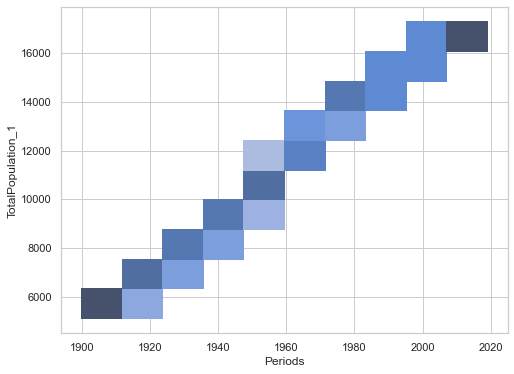

In [67]:
plt.figure(figsize=(8,6))
sns.histplot(data=NL, x='Periods', y='TotalPopulation_1',bins=10)

In [68]:
sns.histplot?


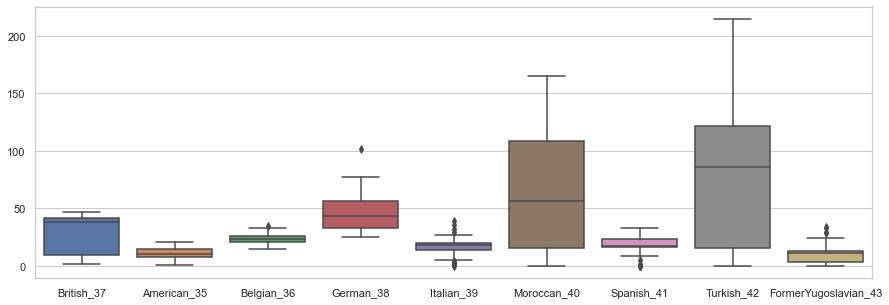

In [69]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.boxplot(data=NL[['British_37','American_35',"Belgian_36", 'German_38','Italian_39',
                     'Moroccan_40','Spanish_41', 'Turkish_42','FormerYugoslavian_43']]);

In [70]:
NL[['British_37','American_35',"Belgian_36", 'German_38','Italian_39',
                     'Moroccan_40','Spanish_41', 'Turkish_42','FormerYugoslavian_43']].describe()

,British_37,American_35,Belgian_36,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43
count,69.000000,68.000000,69.000000,69.000000,69.000000,67.000000,67.000000,68.000000,67.000000
mean,28.269565,10.522059,23.818841,47.052174,16.808696,65.947761,17.701493,83.852941,10.541791
std,16.317307,4.718583,3.602910,16.774575,7.589655,53.272565,9.038461,63.904702,7.613965
min,1.300000,0.500000,14.900000,24.900000,0.200000,0.000000,0.000000,0.000000,0.100000
25%,9.500000,7.375000,20.700000,33.200000,14.200000,15.950000,16.650000,15.700000,3.800000
50%,38.000000,10.600000,23.600000,43.700000,17.800000,56.600000,17.500000,86.400000,11.400000
75%,41.400000,14.600000,26.000000,56.400000,20.300000,108.850000,23.300000,121.450000,13.400000
max,47.300000,20.800000,34.400000,102.000000,39.100000,165.100000,32.700000,214.800000,33.500000


<AxesSubplot:xlabel='Periods'>

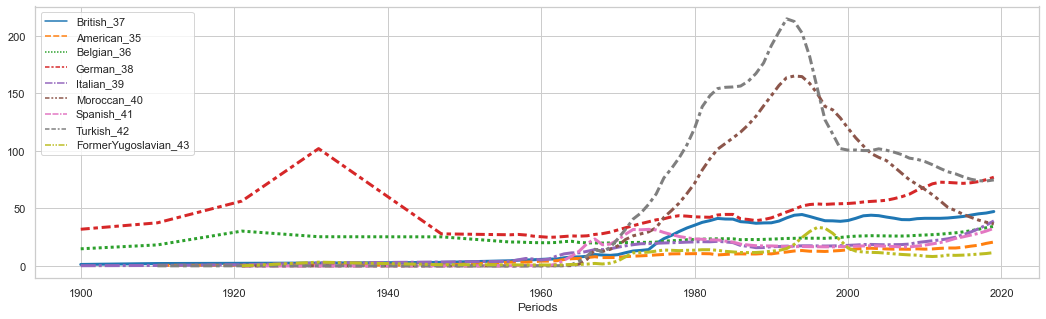

In [71]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['British_37','American_35','Belgian_36','German_38','Italian_39','Moroccan_40','Spanish_41','Turkish_42','FormerYugoslavian_43']
sns.lineplot(data=NL.set_index('Periods')[columns], palette="tab10", linewidth=3)

In [72]:
NL.set_index('Periods')[columns]

,British_37,American_35,Belgian_36,German_38,Italian_39,Moroccan_40,Spanish_41,Turkish_42,FormerYugoslavian_43
Periods,,,,,,,,,
1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,1.3,NaN,14.9,31.9,0.2,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
NL['%Foreigners'] = NL['TotalForeignNationalities_34']/NL['TotalPopulation_4']

<AxesSubplot:xlabel='Periods'>

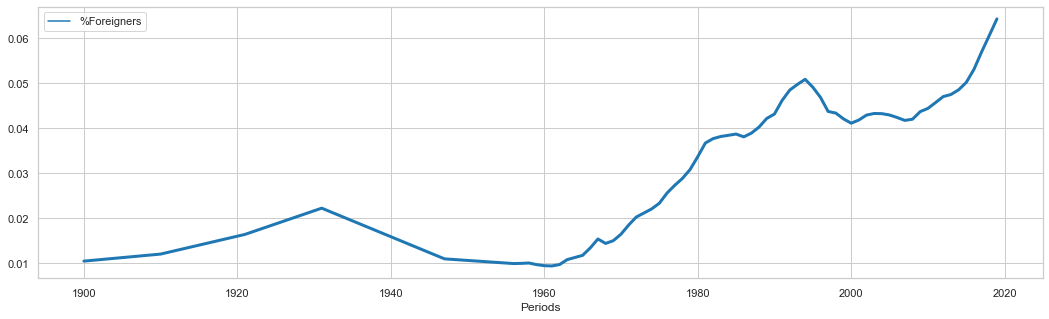

In [74]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['%Foreigners']
sns.lineplot(data=NL.set_index('Periods')[columns], palette="tab10", linewidth=3)

## Life Style

In [75]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [76]:
import os
from IPython.display import Image, display, HTML

In [77]:
@interact
def show_recs_more_than(column=list(LS.select_dtypes('number').columns), 
                          x=(50, 80, 1)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(LS.loc[LS[column] > x, ['HeavySmokersInThePopulation_6', 'CigarettesPerDayPerSmoker_9', 'QuittingAttemptsInThePast12Months_11']])

interactive(children=(Dropdown(description='column', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2',…

In [78]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

<AxesSubplot:xlabel='Periods'>

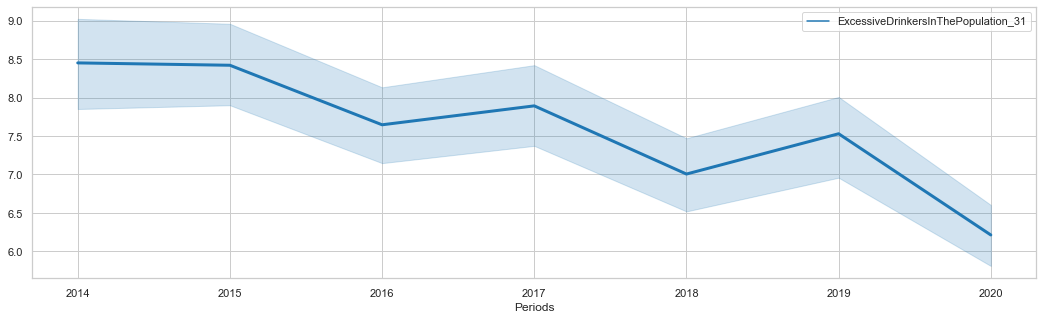

In [79]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['ExcessiveDrinkersInThePopulation_31']
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3)

In [80]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

<AxesSubplot:xlabel='Periods'>

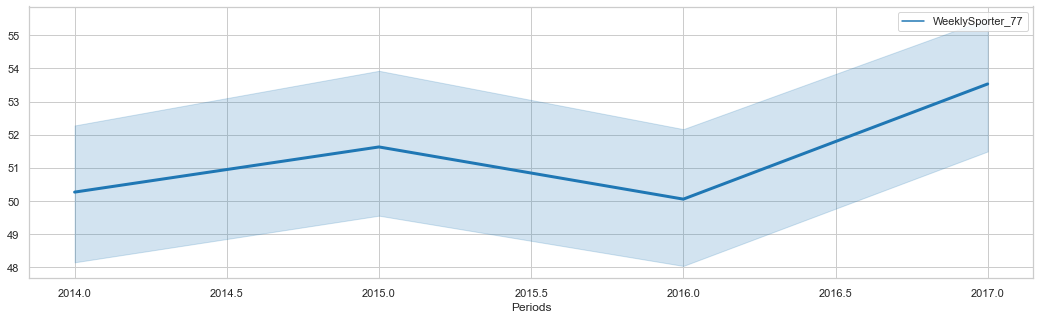

In [81]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['WeeklySporter_77']
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3)

In [82]:
@interact
def correlations(column1=list(LS.select_dtypes('number').columns), 
                 column2=list(NL.select_dtypes('number').columns)):
    print(f"Correlation: {LS[column1].corr(NL[column2])}")

interactive(children=(Dropdown(description='column1', options=('ID', 'Periods', 'Smokers_1', 'FormerSmokers_2'…

<AxesSubplot:xlabel='Periods'>

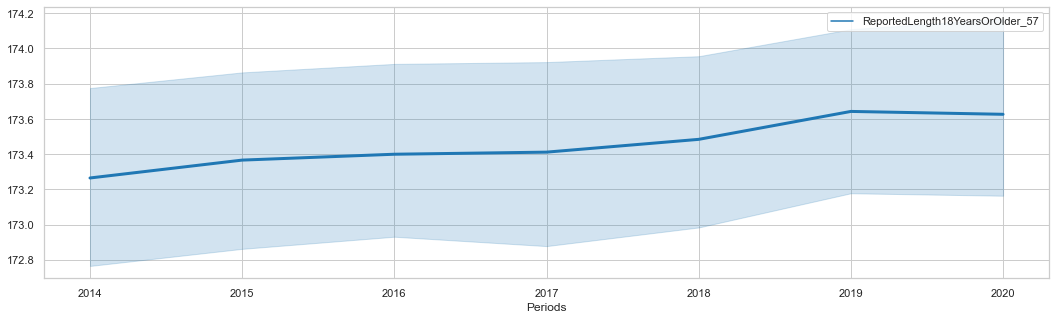

In [83]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['ReportedLength18YearsOrOlder_57']
sns.lineplot(data=LS.set_index('Periods')[columns], palette="tab10", linewidth=3)

<AxesSubplot:xlabel='Periods'>

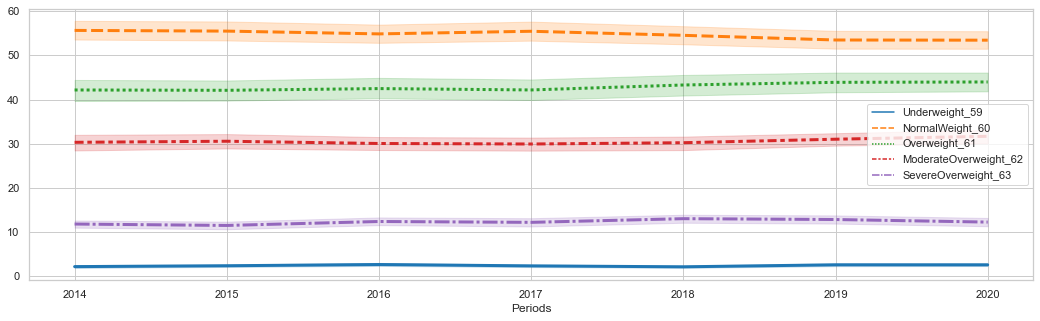

In [84]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18,5))
columns=['Underweight_59','NormalWeight_60','Overweight_61','ModerateOverweight_62','SevereOverweight_63']
sns.lineplot(data=LS.set_index('Periods')[columns],  palette="tab10", linewidth=3)

<AxesSubplot:xlabel='Overweight_61', ylabel='Count'>

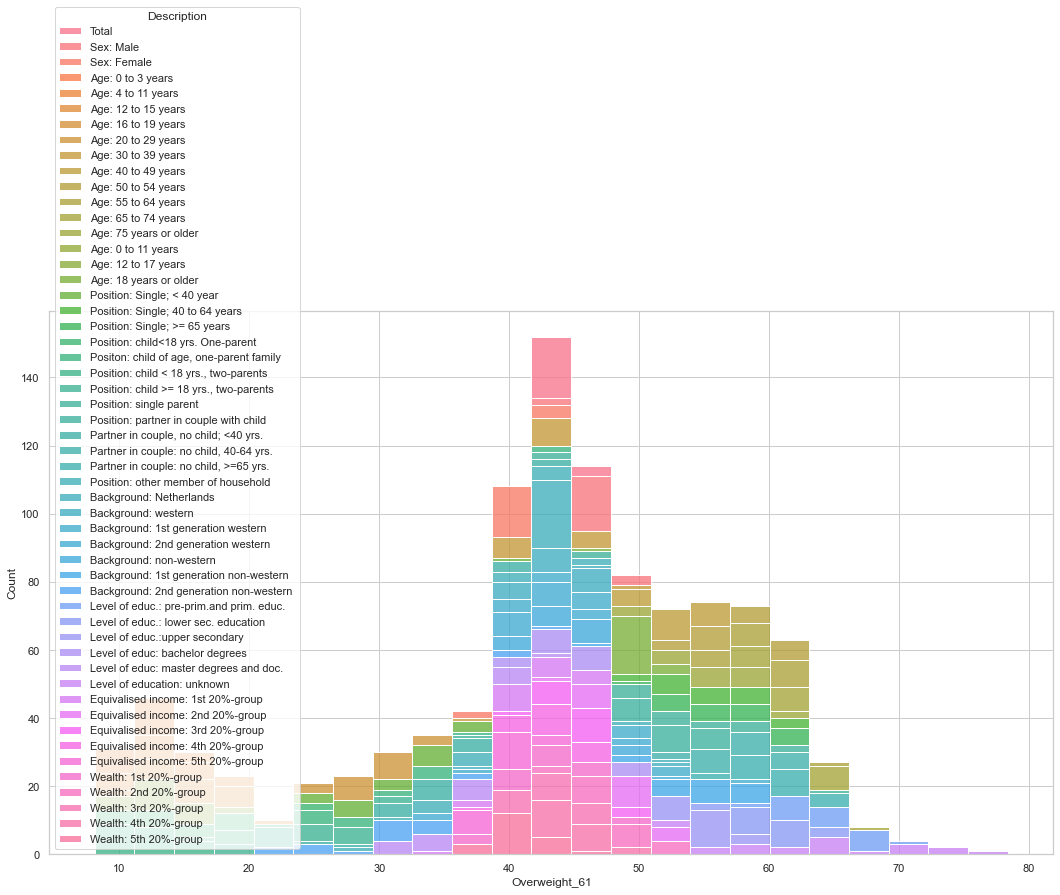

In [85]:
plt.figure(figsize=(18,10))

sns.histplot(data=LS, x='Overweight_61', hue='Description', multiple="stack")

<AxesSubplot:>

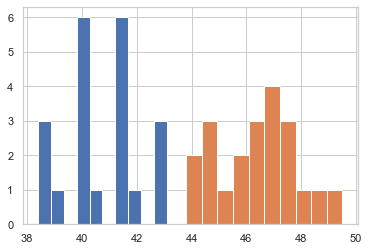

In [86]:
Obesity_Female = LS[LS['Description']=='Sex: Female']
Obesity_Male = LS[LS['Description']=='Sex: Male']

Obesity_Female['Overweight_61'].hist()
Obesity_Male['Overweight_61'].hist()

## References

CBS OpenData StatLine - Netherlands Population dynamics from 1899 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37556eng&_theme=1113

LyfeStyle from 2014 https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83021ENG&_theme=1064